# IND and ROD

## Definition

An out-standing work[1] has introduced two important indicators: IND and ROD. Both indicators are involved in the determination of the chemical rank for the target data matrices. IND and ROD seem named after indicator and ratio-of-derivatives, respectively.

$
\sum_{i=1}^N \sum_{a=L+1}^A e_{i,a}^2 =  \sum_{i=1}^N \sum_{j=1}^M d_{i,j}^2 -  \sum_{i=1}^N \sum_{a=1}^L t_{i,a}^2 
\\
IND(L) = \frac{ \sqrt{ \sum_{i=1}^N\sum_{a=L+1}^A e_{i,a}^2  }}{ (N-L)^2 }
\\
ROD(L) = \frac{IND(L-2) - IND(L-1)}{IND(L-1) - IND(L)} \quad (L\geq3),
$

where $e_{i,a}$, $d_{i,j}$, and $t_{i,a}$ denote PCA projection error, original spectral intensity, and PCA score respectively. $i$, $j$, and $a$ denote the index of sample, the index of wavelength, and the index of PCA score. $L$ denotes the number of components.

(Note that the variance of the whole matrix after centering is equal to that of the whole PCA score matrix. Moreover, the reference shows the wrong equation, I guess. Based on the meanings of both variance of spectra matrix and variance of PCA scores, the equations above must be the correct one. )

On another note, $IND(L-1) \geq IND(L)$ is generally true because the remaining error IND(L) decrease monotonously along with $L$. Thus, ROD(L) basically takes non-negative value.

## Usage

After computing IND or ROD, one can take the number of components that achieves the maximum value of the indicator.

[1] D. Tefera; et al. $\it{Ind. Eng. Chem. Res.}$ 2017 vol: 56 pp: 10756-10769

In [1]:
from pymcr import metrics
from scipy import io
import numpy as np

import requests
import matplotlib
matplotlib.rcParams['font.size'] = 24.0
import matplotlib.pyplot as plt
from warnings import filterwarnings# because Xmix has dtype('>f8')
filterwarnings('ignore')
%matplotlib inline

In [2]:
url = 'http://www.eigenvector.com/data/tablets/nir_shootout_2002.mat'
# Thanks to https://stackoverflow.com/questions/16694907/how-to-download-large-file-in-python-with-requests-py
local_filename = 'nir_shootout_2002.mat'
r = requests.get(url, stream=True)
with open(local_filename, 'wb') as f:
    for chunk in r.iter_content(chunk_size=1024): 
        if chunk: # filter out keep-alive new chunks
            f.write(chunk)
mat = io.loadmat('nir_shootout_2002.mat' )

In [3]:
for x in mat['calibrate_1'][0][0]:
    if len(x) > 1:
        if np.sum(x[0].shape)>2:
            print(x.dtype)
            Xmix = x
        elif np.sum(x[0][0].shape) > 0:
            index_samples = x[0][0]

>f8


In [4]:
# Computation
IND = metrics.ind(Xmix, ul_rank=60)
ROD = metrics.rod(Xmix, ul_rank=60)

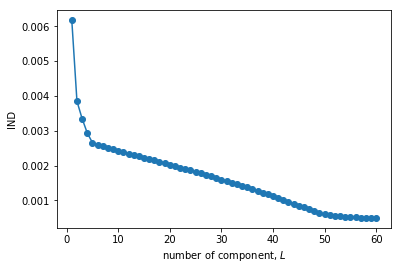

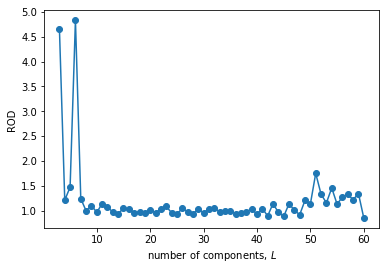

In [5]:
# Visualization
plt.plot(np.arange(1, len(IND)+1), IND,'o-')
plt.xlabel('number of component, $L$')
plt.ylabel('IND')
plt.show()

plt.plot(np.arange(3, len(IND)+1), ROD,'o-')
plt.xlabel('number of components, $L$')
plt.ylabel('ROD')
plt.show()

In [6]:
# ROD(L) when L=3
print( (IND[0] - IND[1])/(IND[1] - IND[2]) )
print( ROD[0] )

4.665466859162356
4.66546685916238


In [7]:
print('{} components are hidden in the `Xmix`'.format(np.argmax(ROD)+1+2))

6 components are hidden in the `Xmix`
